# Clustering

## Introduction

scRNA-seq에서 clustering할때는 unsupervised clustering 또는 graph based clustering을 사용합니다. Unsupervised clustering 중 가장 유명한 것은 k-means clustering입니다. 이런 방법은 세포 사이의 거리 메트릭(PCA, tSNE 또는 UMAP과 같은 저차원 표현을 기반)을 계산한 거리를 기반으로 세포를 clustering 합니다. 

Graph based clustering은 neighborhood graph를 분할합니다. Neighborhood graph는 각 세포를 노드로 취급합니다. 그리고 이 노드들은 KNN(k nearest neighor)에 연결시키고(PCA, tSNE 또는 UMAP과 같은 저차원 표현을 기반) 이러한 연결을 기반으로 neighborhood graph는 분할됩니다. 이런 방법은 일반적으로 다른 클러스터링 방법보다 빠르다고 합니다.

K-means 클러스터링과 그래프 기반 louvain 및 leiden 클러스터링을 살펴보겠습니다.

### Load data

In [1]:
! pip install igraph
import scanpy as sc
import igraph
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from matplotlib import pyplot as plt

%matplotlib inline

adata = sc.read('./data/brain_embeddings.h5ad')

## K-means clustering

K-mean clustering의 목표는 N 개의 셀을 k 개의 서로 다른 클러스터로 분할하는 것입니다. 클러스터의 중심들이 설정되고, 각 세포는 가장 가까운 클러스터에 포함되게 됩니다. 데이터 세트의 UMAP representaion에 k-means를 적용해 보겠습니다.

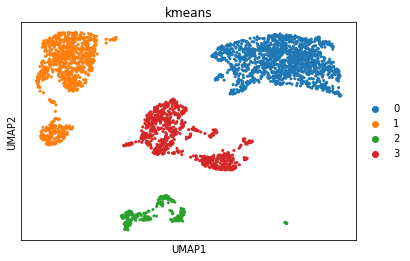

In [3]:
# 각 세포의 UMAP 좌표 추출
umap_coordinates = adata.obsm['X_umap'] 
kmeans = KMeans(n_clusters=4, random_state=0).fit(umap_coordinates) 

# 레이블을 받고 AnnData 객체에서 메타데이터의 열로 추가합니다
adata.obs['kmeans'] = kmeans.labels_
adata.obs['kmeans'] = adata.obs['kmeans'].astype(str)

sc.pl.umap(adata, color='kmeans')

Rand index를 통해 두 세트의 categorical label 간의 유사성(ex: 세포 type 레이블 및 클러스터 레이블)을 알 수 있습니다. 

In [4]:
rand_index = adjusted_rand_score(labels_true = adata.obs['cell_ontology_class'], labels_pred = adata.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.82


## Graph based clustering

### Louvain
Error가 나면 "conda install -c conda-forge louvain"을 콘솔에 칩니다.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/eujin/.conda/envs/scRNAnotebook

  added / updated specs:
    - louvain


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.10.8          |  py310h2ec42d9_1         145 KB  conda-forge
    igraph-0.9.7               |       hacf96bb_0         1.4 MB  conda-forge
    libcxx-13.0.1              |       hc203e6f_0         1.1 MB  conda-forge
    llvm-openmp-13.0.1         |       hcb1a161_1         309 KB  conda-forge
    louvain-0.7.1              |  py310hba3363e_1         113 KB  conda-forge
    openssl-1.1.1n             |       h6c3fc93_0         1.9 MB  conda-forge
    python-igraph-0.9.9        |  py310h1207af4_0    

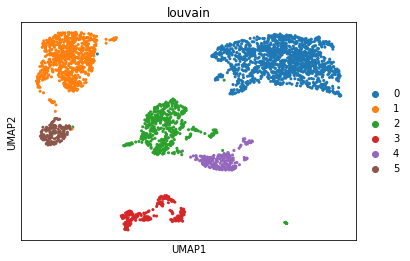

The rand index is  0.91


In [6]:
! conda install -c conda-forge louvain -y

sc.tl.louvain(adata, resolution=0.1)
sc.pl.umap(adata, color='louvain')
rand_index = adjusted_rand_score(adata.obs['cell_ontology_class'], adata.obs['louvain'])
print('The rand index is ', round(rand_index, 2))

### Leiden

Error가 나면 "conda install -c conda-forge leidenalg"을 콘솔에 칩니다.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/eujin/.conda/envs/scRNAnotebook

  added / updated specs:
    - leidenalg


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    leidenalg-0.8.9            |  py310h9d931ec_0         136 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         136 KB

The following NEW packages will be INSTALLED:

  leidenalg          conda-forge/osx-64::leidenalg-0.8.9-py310h9d931ec_0



leidenalg-0.8.9      | 136 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


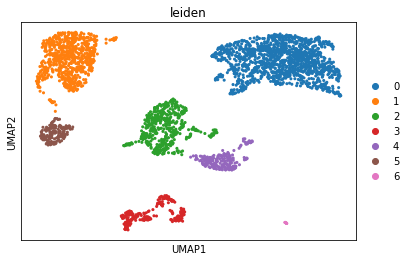

The rand index is  0.91


In [7]:
! conda install -c conda-forge leidenalg -y
sc.tl.leiden(adata, resolution=0.1)
sc.pl.umap(adata, color='leiden')
rand_index = adjusted_rand_score(adata.obs['cell_ontology_class'], adata.obs['louvain'])
print('The rand index is ', round(rand_index, 2))

In [8]:
adata.write('./data/brain_clusters.h5ad')